<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [122]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#!pip install seaborn --upgrade

Load the dataset into a dataframe.


In [123]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [124]:
df.describe(include='all')

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
count,11398.000000,11398,11398,11398,11317,11398,11398,11347,11286,10661,...,11313,9433,11111.000000,11325,11275,10856,10723,11258,11379,11384
unique,NaN,2,2,4,3,2,135,3,9,12,...,6,15,NaN,7,2,7,89,2,3,3
top,NaN,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,NaN,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
freq,NaN,10618,9273,3652,5468,10968,3127,9658,5852,6953,...,8704,2099,NaN,10480,11196,10066,7357,6699,8048,8245
mean,12490.392437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.778895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7235.461999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.393686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6264.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,12484.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,18784.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
#Clean data operation
df['ConvertedComp'] = pd.to_numeric(df['ConvertedComp'], errors='coerce')
df = df.dropna(subset=['ConvertedComp'])
df['ConvertedComp'] = df['ConvertedComp'].astype(int)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

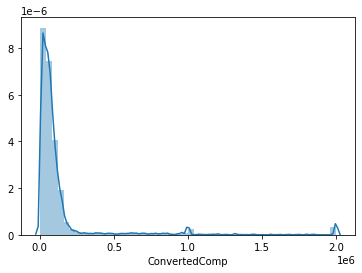

In [126]:
# Create a distribution curve for the ConvertedComp column
sns.distplot (df['ConvertedComp'], hist = True)

Plot the histogram for the column `ConvertedComp`.


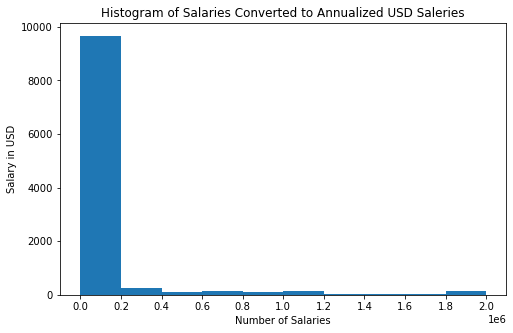

In [127]:
# Create a histogram of the ConvertedComp column

count, bin_edges = np.histogram(df['ConvertedComp'].dropna())

df['ConvertedComp'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Salaries Converted to Annualized USD Saleries') # Add a title to  histogram
plt.ylabel('Salary in USD') # add y-label
plt.xlabel('Number of Salaries') # add x-label

plt.show()

What is the median of the column `ConvertedComp`?


In [128]:
# determine the median value of the ConvertedComp column
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [129]:
# Count the number of 'Men' who responded to the survey
x = (df['Gender'].values == 'Man').sum()
x
print('The number of responders who identified themselves only as a Man is',x)

The number of responders who identified themselves only as a Man is 9725


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [130]:
# Determine median of ConvertedComp column for only resonders who identify as being a woman
df2=df[df['Gender'].eq('Woman')]
y=df2['ConvertedComp'].median()
print('The median ConvertedComp of responders identified themselves only as a Woman is',y)

The median ConvertedComp of responders identified themselves only as a Woman is 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [131]:
#Print the five number summary for the column 'Age'

ageMin = df['Age'].min()
ageQ1 = df.Age.quantile([0.25])
ageMedian = df['Age'].median()
ageQ3 =  df.Age.quantile([0.75])
ageMax = df['Age'].max()

print('MinnAge',ageMin,'\n\nQuartile1',ageQ1,'\n\nMedianAge',ageMedian,'\n\nQuartile3',ageQ3,'\n\nMaxAge',ageMax)

MinnAge 16.0 

Quartile1 0.25    25.0
Name: Age, dtype: float64 

MedianAge 29.0 

Quartile3 0.75    35.0
Name: Age, dtype: float64 

MaxAge 99.0


Plot a histogram of the column `Age`.


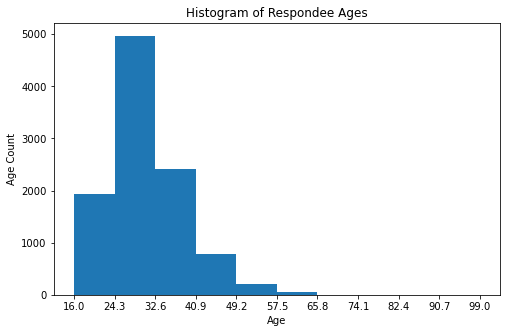

In [132]:
# Histogram of the column 'Age'
count, bin_edges = np.histogram(df['Age'].dropna())

df['Age'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Respondee Ages') # Add a title to  histogram
plt.xlabel('Age') # Label X Axis
plt.ylabel('Age Count') # Label Y Axis

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


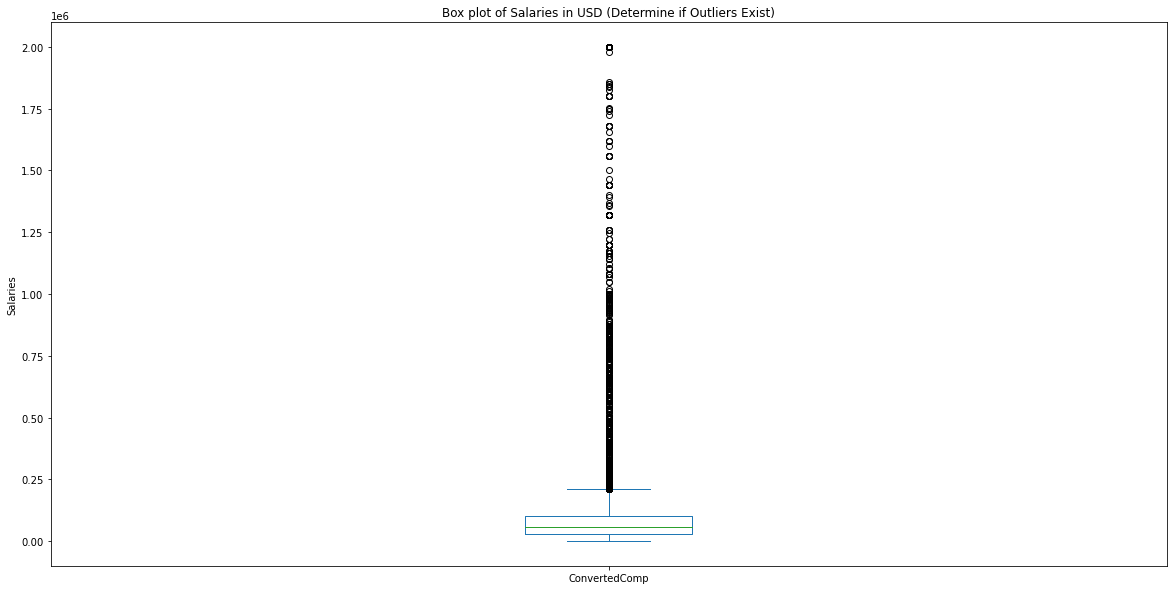

In [133]:
#Determine if outliers existing by using a boxplot
df['ConvertedComp'].plot(kind='box', figsize=(20,10))

plt.title('Box plot of Salaries in USD (Determine if Outliers Exist)')
plt.ylabel('Salaries')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [134]:
# Determine the Inter Quartile Range for 'ConvertedComp' column
# your code goes here
quantile1 = df['ConvertedComp'].quantile(0.25)
quantile3 = df['ConvertedComp'].quantile(0.75)
interQuantileRange = quantile3 - quantile1
interQuantileRange

73132.0

Find out the upper and lower bounds.


In [135]:
# Determine the upper and lower bounds of the 'ConvertedComp'column
maxValue = df['ConvertedComp'].max()
minValue = df['ConvertedComp'].min()
print (maxValue)
print (minValue)

2000000
0


Identify how many outliers are there in the `ConvertedComp` column.


In [136]:
# Determine the number of outliers in the 'ConvertedComp' column
outliers = ((df['ConvertedComp'] < (quantile1 - 1.5 * interQuantileRange)) | (df['ConvertedComp'] > (quantile3 + 1.5 * interQuantileRange))).sum()
outliers

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [137]:
# Create new dataframe with outlers removed
newDF = (df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))
df[newDF] = np.nan
print('Min',df['ConvertedComp'].min(),'Mean',df['ConvertedComp'].mean(),'Max',df['ConvertedComp'].max())


Min 0.0 Mean 59883.20838915799 Max 209356.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [138]:
# Determine correlation between Age column and all other columns
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019354,0.010878,-0.016221,0.005293,0.002180
CompTotal,-0.019354,1.000000,-0.063561,0.004910,0.017007,0.006337
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.016221,0.004910,0.034351,1.000000,0.038935,0.032032
CodeRevHrs,0.005293,0.017007,-0.088934,0.038935,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
